# Forecasting Model - Prophet

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data/confirmed_pivot.csv")

In [10]:
df = df[df["country"] == "Brazil"]#.reset_index()

In [11]:
df['date'] = pd.to_datetime(df.date)
df = df.set_index("date")

In [13]:
df['ds'] = df.index
df['y'] = df.total
df.drop(['total',"country"],axis = 1, inplace = True)

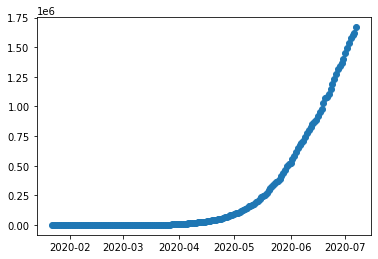

In [17]:
plt.scatter(x=df.ds, y=df.y)

# Modelo default

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


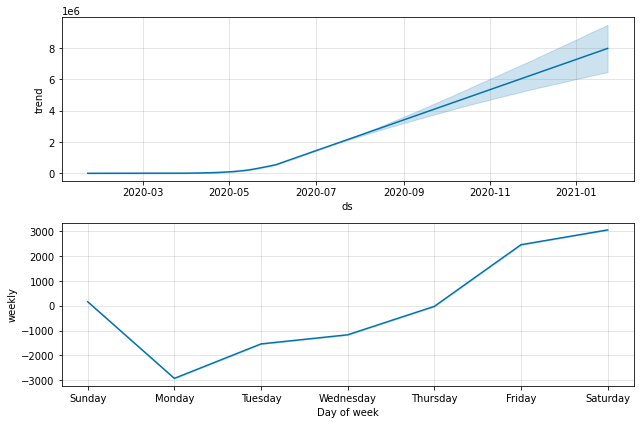

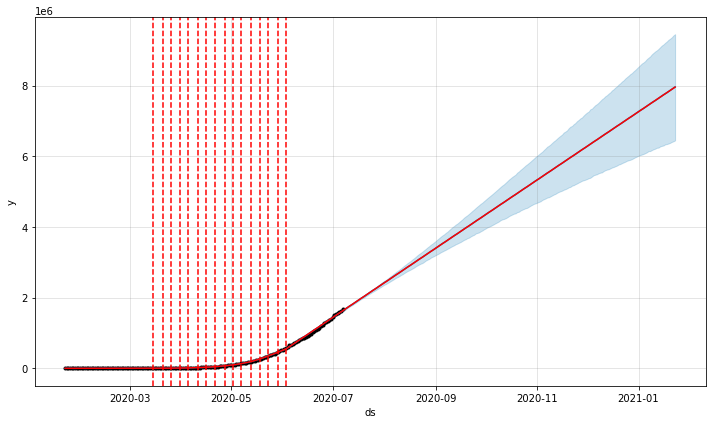

In [42]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=200, freq='D')
forecast = m.predict(future)
m.plot_components(forecast)
plt.show()
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.show()

# Alterando alguns parâmetros

In [44]:
Prophet?

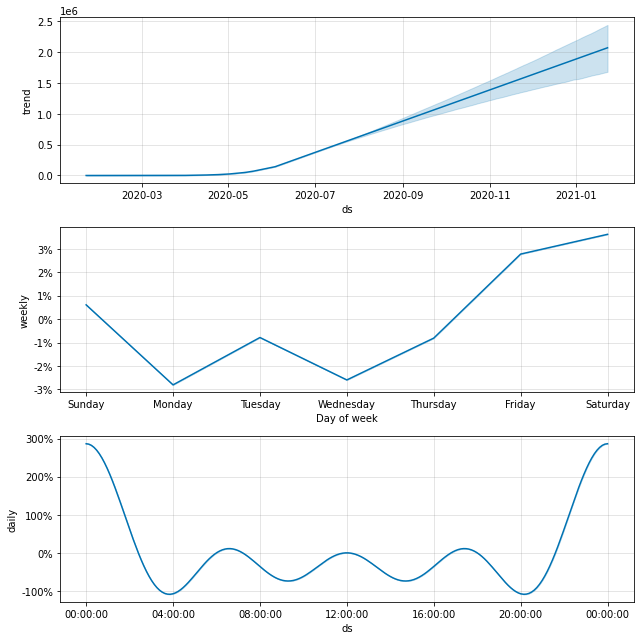

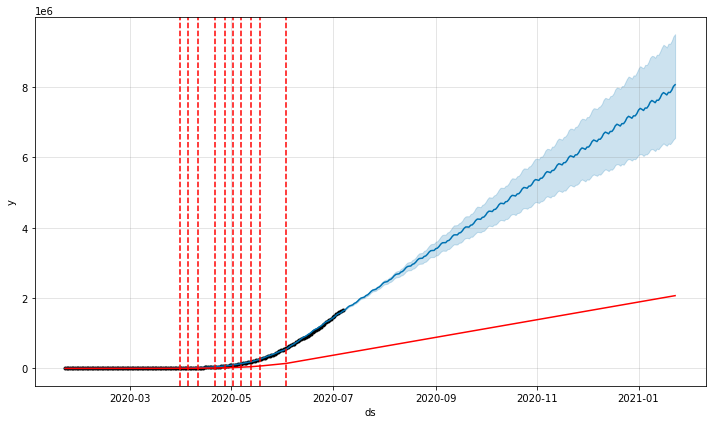

In [45]:
m = Prophet(daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=False, seasonality_mode="multiplicative")
m.fit(df)
future = m.make_future_dataframe(periods=200, freq='D')
forecast = m.predict(future)
m.plot_components(forecast)
plt.show()
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.show()